<a href="https://colab.research.google.com/github/SadatRafi11/NumericalMethodsUsingPython/blob/main/Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    
<h1> Math 4544 Numerical Analysis Lab</h1>
<h2> Lab 03 <h2>

The Objectives of this weeks lab is to implement and understand different methods of Interpolation. 
<br>

In the mathematical field of numerical analysis, interpolation is a type of estimation, a method of constructing new data points within the range of a discrete set of known data points.

In engineering and science, one often has a number of data points, obtained by sampling or experimentation, which represent the values of a function for a limited number of values of the independent variable. It is often required to interpolate, i.e., estimate the value of that function for an intermediate value of the independent variable. A closely related problem is the approximation of a complicated function by a simple function. Suppose the formula for some given function is known, but too complicated to evaluate efficiently. A few data points from the original function can be interpolated to produce a simpler function which is still fairly close to the original. The resulting gain in simplicity may outweigh the loss from interpolation error. For more basics of interpolation check interpolation on  [Wikipedia](https://en.wikipedia.org/wiki/Interpolation) 
 

At the successful completion of this lab you should be able to implement different methods of linear and non linear interpolation. 



Go to  [matplotlib.pyplot tutorials](https://matplotlib.org/gallery/index.html#pyplot) for all kinds of help regarding plot. For interpolation lectures, you can have a look at the class [lecture.](http://mathforcollege.com/nm/mws/gen/05inp/mws_gen_inp_txt_lagrange.pdf) 


## Task 01: Implementing $n^{th}$ order lagrangian interpolation ##
The upward velocity of a rocket is given in the following table. 

| t (s) |  v(t) (m/s) |
| --- | --- | 
| 0 | 0 | 
| 10 | 227.04 | 
| 15 | 362.78 | 
| 20 | 517.35 | 
| 22.5 | 602.97 | 
| 30 | 901.67 | 
| 32.5 | 1010.27 | 
| 37 | 1125 | 
| 40 | 1175 | 
| 42 | 1205 | 
| 45 | 1230 | 
| 49 | 1260 | 
| 52 | 1290 | 
| 54 | 1340 | 


*    

*    Determine the value of the velolcity at $t = 27$ using an $ n^{th}$ order lagrangian interpolation. Your solution should take $n$ as an input and should be able to select closest $(n+1)$ points for finding out the lagrangian coeffecients. 

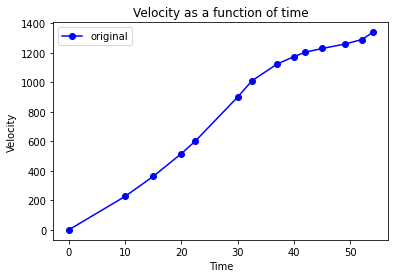

In [ ]:
#dataset description
import numpy as np
import matplotlib.pyplot  as plt  
t = np.array([0,10,15,20,22.5,30,32.5,37,40,42,45,49,52,54])
vt = np.array([0,227.04,362.78,517.35,602.97,901.67,1010.27,1125,1175,1205,1230,1260,1290,1340])
plt.plot(t, vt, color='b', marker='o', label='original')
plt.title('Velocity as a function of time')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()
plt.show()


Take $n$ as an input [Try values like 2, 3, 4] and select closest $(n+1)$ data points from the 


given data. 

In [ ]:
def trimmer__(t_in, vt_in, n, x_in):
    t_trimmed = np.zeros(n+1)
    vt_trimmed = np.zeros(n+1)
    # t_in : time list
    # vt_in: velocity list
    # x_in : value of t at which vt should be calculated
    # output : closest n+1 points to the query in form [numpy array consisting of times, numpy array consisting of corresponding velocities]
    dist = np.sort(np.abs (t_in -x_in))
    j = 0
    for i in range(len(t_in)):
        if (np.abs(t_in[i]-x_in) <=dist[n]):
            t_trimmed[j] = t_in[i]
            vt_trimmed[j] = vt_in[i]
            j=j+1

    return [t_trimmed, vt_trimmed]

The lagrangian method of interpolation is defiend using the following equation:

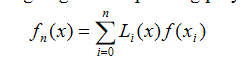

As we can see, for n-th order langrangian interpolation, we need to calculate Li(x) for i =0 to n. 
Li(x) is defined using the folloing definition: 

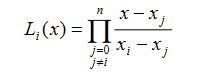 

In this definition, i and j are being used to index into the values of x. 

To help with our implementation, lets first create a function that can calculate this Li(x) given i, the values of x, the values of f(x) and n.

The x and f(x) in the formula correspond to t and vt in the given lab task


In [ ]:
# you have to complete this part
# implement the following function so that it can calculate Li from the passed parameters. look at the above text cell for instructions

def Li(t_trim, x, i, n):
    li = 1.0
    # li: ith lagrangian multiplier
    #your code will start here
    for j in range(n):
        if i != j:
            li *= (x - t_trim[j])/(t_trim[i] - t_trim[j])
    #you code will end here 
    return li
    

Now, lets calculate the n-th order lagrangian using the formula given in the previous text cell.

Hint : 
*   The lagrangian is a sum of n terms
*   each term has 2 "things" multiplied together. the lagrangian L(i) and the function value f(xi)
*   maybe we utilize the Li function defined in the previous cell?



In [ ]:
# this cell has to be completed by you as part of this lab task

def nth_lagrangian(t_trim, vt_trim, x, n):
    # t: input time list
    # vt: input velocity list
    # x : value of t at which vt should be calculated
    # n : order of the lagrangian interpolation

    result = 0.0
    #your code will start here
    for i in range(n):
        result += Li(t_trim, x, i, n) * vt_trim[i]
    #you code will end here 
   
    return result
 



In the following cell, the fnction you implemented to calculate the langrangian will be invoked and the interpolated value of f(x) and a given point x will be calculated. (lines 3-9)

Then a set of values within the range of the original input values is taken and corresponding outputs are calculated using the lagrangian (you implemented) (lines 12-17). These values are then plotted to give you a sense of the interpolation function.
For the given data, the graph should look like this:

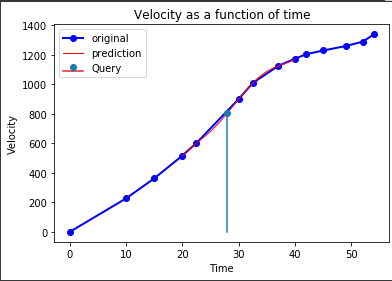


[20.  22.5 30.  32.5 37.  40. ] [ 517.35  602.97  901.67 1010.27 1125.   1175.  ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


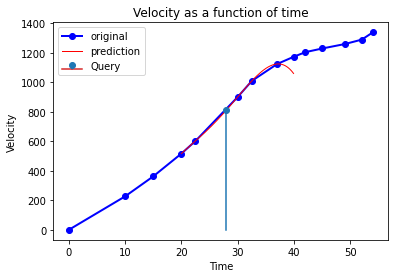

In [ ]:
#Caller function for Lagrangian interpolation

x = 28, 
n = 5
#Selecting n+1 data points
[t_tr, vt_tr] = trimmer__(t, vt, n, x)
print(t_tr, vt_tr)
#calculating value of y at x
y = nth_lagrangian(t_tr, vt_tr, x, n)

#taking range between max and min of selected range to plot a line
t_new = np.arange(t_tr[0], t_tr[n], 0.1)
vt_new = np.arange(t_tr[0], t_tr[n], 0.1)
m = len(t_new)

#calculating new values using old coefficients. 
vt_new = nth_lagrangian(t_tr, vt_tr, t_new, n+1)

plt.plot(t, vt, color='b', marker='o', label='original', linewidth = 2)
plt.plot(t_new, vt_new, color='r', label='prediction', linewidth = 1, )
plt.stem([x],[y], label='Query')
plt.title('Velocity as a function of time')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()
plt.show()


###Observation###

=> We can see that the produced function can match the data points fairly accurately.

## Task 2 ##
A robot arm with a rapid laser scanner is doing a quick quality check on holes drilled in a
15"10" rectangular plate. The centers of the holes in the plate describe the path the arm
needs to take, and the hole centers are located on a Cartesian coordinate system (with the
origin at the bottom left corner of the plate) given by the specifications in Table 3.


|x (in.)| y (in.)|
|---|---|
|2.00| 7.2|
|4.25 |7.1|
|5.25 |6.0|
|7.81 |5.0|
|9.20 |3.5|
|10.60 |5.0|

Find the path traversed through the six points using a fifth order Lagrange polynomial. 

The answer should be a plot like this :

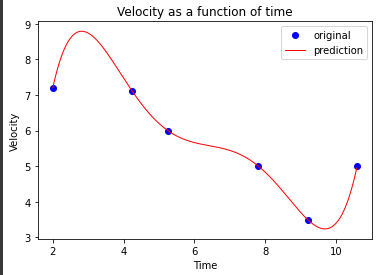

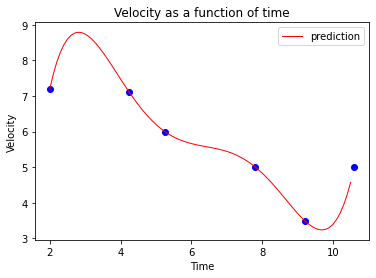

In [ ]:
x_data = np.array([2., 4.25, 5.25, 7.81, 9.20, 10.60])
y_data = np.array([7.2, 7.1, 6.0, 5.0, 3.5, 5.0])


x = 5.0
n = 5

#your code will start here
[x_tr, y_tr] = trimmer__(x_data, y_data, n, x)

#taking range between max and min of selected range to plot a line
x_new = np.arange(x_tr[0], x_tr[n], 0.1)
# y_new = np.arange(y_tr[0], y_tr[n], 0.1)
m = len(x_new)

#calculating new values using old coefficients. 
y_new = nth_lagrangian(x_tr, y_tr, x_new, n+1)

plt.plot(x_data, y_data, 'bo')
plt.plot(x_new, y_new, color='r', label='prediction', linewidth = 1)
plt.title('Velocity as a function of time')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()
plt.show()

#you code will end here 


###Observation###

=> We can see that the produced function can match the data points fairly accurately.